# In-class transcript from Lecture 16, March 13, 2019


# Imports and defs for lecture

In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import math
import time
import struct
import json
import pandas as pd
import networkx as nx
import numpy as np
import numpy.linalg as npla
import scipy
import scipy.sparse.linalg as spla
from scipy import sparse
from scipy import linalg
from scipy import integrate
from scipy.stats import norm
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d



In [2]:
# Making matrices for the discrete Laplacian operator 

# One dimension 
def make_A_1D(k):
    """Create the matrix of the discrete Laplacian operator in one dimension on a k-point grid.
    Parameters: 
      k: number of grid points.
    Outputs:
      A: the sparse k-by-k matrix representing the finite difference approximation to Laplace's equation.
    """
    # First make a list with one triple (row, column, value) for each nonzero element of A
    triples = []
    for x in range(k):

        # what row of the matrix is grid point x?
        row = x
        
        # the diagonal element in this row
        col = row
        triples.append((row, col, 2.0))
        # connect to grid neighbors in x dimension
        if x > 0:
            col = row - 1
            triples.append((row, col, -1.0))
        if x < k - 1:
            col = row + 1
            triples.append((row, col, -1.0))

    # Finally convert the list of triples to a scipy sparse matrix
    ndim = k
    rownum = [t[0] for t in triples]
    colnum = [t[1] for t in triples]
    values = [t[2] for t in triples]
    A = sparse.csr_matrix((values, (rownum, colnum)), shape = (ndim, ndim))
    
    return A 


# Lecture begins here

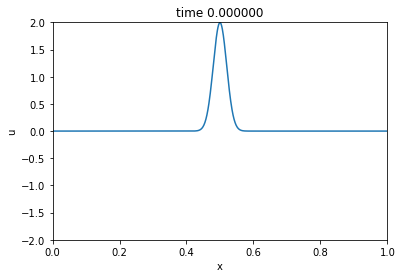

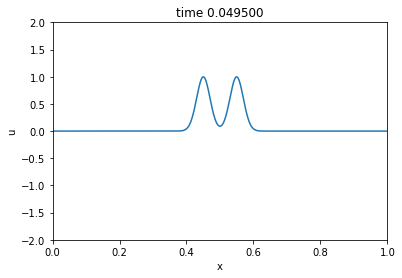

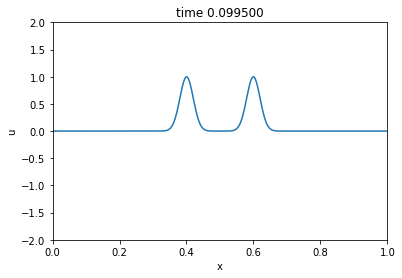

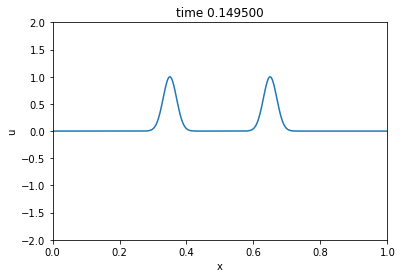

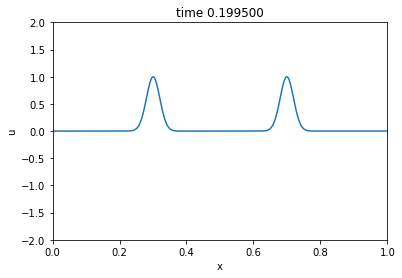

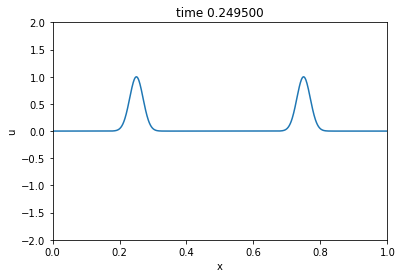

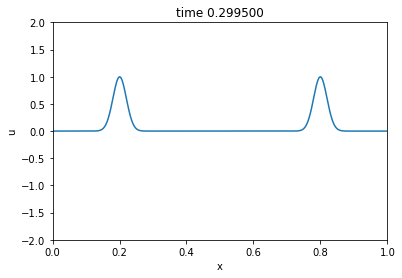

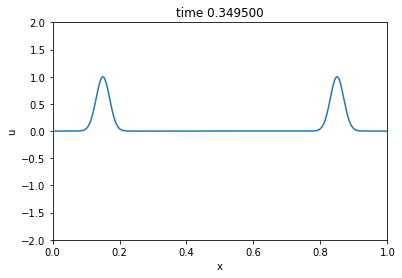

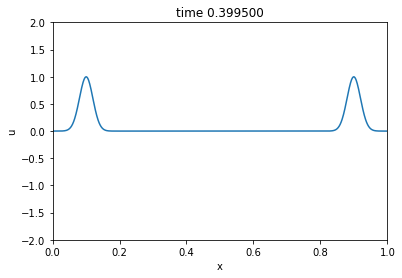

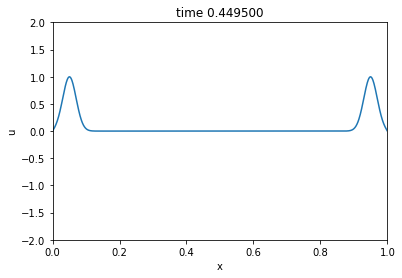

In [3]:
# Wave equation in 1D, fully discrete with centered differences in both time and space
#   d^2u / dt^2 = c * d^2u / dx^2,
#   with boundary values of 0 at the endpoints of unit interval,
#   initial values for u to be specified in the interior of the unit interval,
#   initial values of 0 for du/dt at all points in unit interval, 
#   and (for now) constant propagation speed c.

# Parameters of discretization and the equation
xspan  = (0, 1)         # Left and right endpoints of the 1-D interval
dx     = .001           # Distance between discrete points on the line
k      = int(np.round(np.diff(xspan)/dx) - 1) # Number of discrete points, not including endpoints

tspan  = (0, .45)       # Starting and stopping times
dt     = .0005          # Length of time step 

c = 1                   # Speed of wave propagation

# Get the matrix for the discrete Laplace operator
A      = make_A_1D(k)

# Initial condition: value of interior points at time 0
midpoint = int(k/2)
u0 =   100 * norm.pdf(range(k), loc = midpoint, scale = k/50)
#u0 = np.sin(np.linspace(0,1,k)*np.pi*4)

# Intialize u and uprev to the same value, 
# because of the initial condition du/dt = 0 everywhere
u     = u0
uprev = u

# For plotting, we include the endpoints in an array xplot of k+2 discrete points,
# and an array uplot of the k interior values along with the 2 boundary values of 0.
xplot         = np.linspace(xspan[0], xspan[1], k+2)
uplot         = np.zeros(k+2)
uplot[1:k+1]  = u

# First plot
%matplotlib inline
plt.figure()
plt.plot(xplot, uplot)
plt.axis([xspan[0], xspan[1], -2, 2])
plt.xlabel('x')
plt.ylabel('u')
plt.title('time %f' % (tspan[0]))
plot_freq = 100

# Now take steps in time from start to finish...
step = 1
for t in np.arange(tspan[0], tspan[1], dt):
    
    unew  = 2*u  -  uprev  -  c * (dt/dx)**2 * A @ u
    uprev = u
    u     = unew
    
    step += 1
    if step % plot_freq == 0:
        uplot[1:k+1] = u
        plt.figure()
        plt.plot(xplot, uplot)
        plt.axis([xspan[0], xspan[1], -2, 2])
        plt.xlabel('x')
        plt.ylabel('u')
        plt.title('time %f' % (t+dt))
